In [249]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
import sqlite3
import numpy as np


In [317]:

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('../database7.db')

# Consulta SQL para selecionar os dados da tabela desejada
query = "SELECT * FROM vaga;"

# Ler os dados do banco de dados SQLite para um DataFrame do Pandas
dados = pd.read_sql_query(query, conn)

# Fechar a conexão com o banco de dados
conn.close()
# dados = pd.read_csv("linkedin_jobs.csv")


In [318]:
dados = dados.reset_index(drop=True)
dados.set_index('id', inplace=True)


In [319]:
dados[(['company'])].describe()

,company
count,1115
unique,621
top,IEL Paraná
freq,89


In [320]:
dados_tec=dados[dados['title'].str.contains("Engenharia de dados|Data Engineer|Engenheiro de dados",case=False, regex=True)]

In [321]:
dados_tec

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,
1,3836417154,2024-03-04,PagBank,Engenheiro de Dados Jr.,São Paulo e Região,Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,None,None,None,None,None,None
3,3801130908,2024-03-04,Grupo Abril,TI | Engenheiro de Dados Júnior,São Paulo e Região,Há 1 mês,https://br.linkedin.com/jobs/view/ti-engenheir...,Mais de 200 candidaturas,Assistente,Tempo integral,Tecnologia da informação,Produção de mídia,O Grupo Abril está com uma posição de Engenhei...
5,3838913545,2024-03-04,Stefanini Brasil,Engenheiro de Dados - São Paulo/SP,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Job DescriptionSomos a maior multinacional bra...
6,3830615469,2024-03-04,Delfia,Engenheiro de dados,"São Paulo, SP",Há 2 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,None,None,None,None,None,None
10,3815228508,2024-03-04,Sinqia,ENGENHEIRO DE DADOS PL/SR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/engenheiro-d...,None,Pleno-sênior,Tempo integral,Tecnologia da informação,Segurança de redes e computadores,"Sinqia, provedora da experiência mais desejada..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,3836233537,2024-03-05,Bradesco,DATA ENGINEER I,"Osasco, SP",Há 1 semana,https://br.linkedin.com/jobs/view/data-enginee...,Mais de 200 candidaturas,Não aplicável,Tempo integral,Financeiro e Outro,Bancos e Bancos de investimento,Sobre o BradescoSomos um dos mais modernos Ban...
370,3817453100,2024-03-05,Banco Master,ANALISTA DE ENGENHARIA DE DADOS JUNIOR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/analista-de-...,None,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Bancos,Job DescriptionAtuar na implantação de pipelin...
720,3820778228,2024-03-05,PagBank,Gerente de Engenharia de Dados,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/gerente-de-e...,Mais de 200 candidaturas,Pleno-sênior,Tempo integral,Engenharia e Tecnologia da informação,Atividades de serviços financeiros,Descrição da VagaNascemos para democratizar os...


In [322]:

dados_tec.drop_duplicates(inplace=True)
dados_tec[dados_tec.duplicated()]

C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\1723577738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.drop_duplicates(inplace=True)


,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,


In [323]:
# dados_tec['job_id'] = dados_tec['link'].apply(lambda x: x.split("?")[0].rsplit('-', 1)[-1])

In [324]:
dados_tec.job_id

id
1      3836417154
3      3801130908
5      3838913545
6      3830615469
10     3815228508
          ...    
309    3836233537
370    3817453100
720    3820778228
791    3830553276
826    3836001150
Name: job_id, Length: 65, dtype: int64

In [325]:
dados_tec.drop_duplicates(subset=['job_id'],inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\1668668586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.drop_duplicates(subset=['job_id'],inplace=True)


In [326]:
dados_tec

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,
1,3836417154,2024-03-04,PagBank,Engenheiro de Dados Jr.,São Paulo e Região,Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,None,None,None,None,None,None
3,3801130908,2024-03-04,Grupo Abril,TI | Engenheiro de Dados Júnior,São Paulo e Região,Há 1 mês,https://br.linkedin.com/jobs/view/ti-engenheir...,Mais de 200 candidaturas,Assistente,Tempo integral,Tecnologia da informação,Produção de mídia,O Grupo Abril está com uma posição de Engenhei...
5,3838913545,2024-03-04,Stefanini Brasil,Engenheiro de Dados - São Paulo/SP,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Job DescriptionSomos a maior multinacional bra...
6,3830615469,2024-03-04,Delfia,Engenheiro de dados,"São Paulo, SP",Há 2 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,None,None,None,None,None,None
10,3815228508,2024-03-04,Sinqia,ENGENHEIRO DE DADOS PL/SR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/engenheiro-d...,None,Pleno-sênior,Tempo integral,Tecnologia da informação,Segurança de redes e computadores,"Sinqia, provedora da experiência mais desejada..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,3836233537,2024-03-05,Bradesco,DATA ENGINEER I,"Osasco, SP",Há 1 semana,https://br.linkedin.com/jobs/view/data-enginee...,Mais de 200 candidaturas,Não aplicável,Tempo integral,Financeiro e Outro,Bancos e Bancos de investimento,Sobre o BradescoSomos um dos mais modernos Ban...
370,3817453100,2024-03-05,Banco Master,ANALISTA DE ENGENHARIA DE DADOS JUNIOR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/analista-de-...,None,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Bancos,Job DescriptionAtuar na implantação de pipelin...
720,3820778228,2024-03-05,PagBank,Gerente de Engenharia de Dados,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/gerente-de-e...,Mais de 200 candidaturas,Pleno-sênior,Tempo integral,Engenharia e Tecnologia da informação,Atividades de serviços financeiros,Descrição da VagaNascemos para democratizar os...


In [327]:
dados_tec.columns

Index(['job_id', 'register_date', 'company', 'title', 'location',
       'time_opened', 'link', 'applications', 'experience_level', 'job_type',
       'role', 'sectors', 'description'],
      dtype='object')

In [328]:
# desired_order = ['job_id', 'title', 'location', 'time_opened','link','applications','experience_level','job_type','role','sectors','description']  # Specify the desired order of column names

# dados_tec = dados_tec[desired_order] 

In [329]:
dados_tec


,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,
1,3836417154,2024-03-04,PagBank,Engenheiro de Dados Jr.,São Paulo e Região,Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,None,None,None,None,None,None
3,3801130908,2024-03-04,Grupo Abril,TI | Engenheiro de Dados Júnior,São Paulo e Região,Há 1 mês,https://br.linkedin.com/jobs/view/ti-engenheir...,Mais de 200 candidaturas,Assistente,Tempo integral,Tecnologia da informação,Produção de mídia,O Grupo Abril está com uma posição de Engenhei...
5,3838913545,2024-03-04,Stefanini Brasil,Engenheiro de Dados - São Paulo/SP,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Job DescriptionSomos a maior multinacional bra...
6,3830615469,2024-03-04,Delfia,Engenheiro de dados,"São Paulo, SP",Há 2 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,None,None,None,None,None,None
10,3815228508,2024-03-04,Sinqia,ENGENHEIRO DE DADOS PL/SR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/engenheiro-d...,None,Pleno-sênior,Tempo integral,Tecnologia da informação,Segurança de redes e computadores,"Sinqia, provedora da experiência mais desejada..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,3836233537,2024-03-05,Bradesco,DATA ENGINEER I,"Osasco, SP",Há 1 semana,https://br.linkedin.com/jobs/view/data-enginee...,Mais de 200 candidaturas,Não aplicável,Tempo integral,Financeiro e Outro,Bancos e Bancos de investimento,Sobre o BradescoSomos um dos mais modernos Ban...
370,3817453100,2024-03-05,Banco Master,ANALISTA DE ENGENHARIA DE DADOS JUNIOR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/analista-de-...,None,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Bancos,Job DescriptionAtuar na implantação de pipelin...
720,3820778228,2024-03-05,PagBank,Gerente de Engenharia de Dados,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/gerente-de-e...,Mais de 200 candidaturas,Pleno-sênior,Tempo integral,Engenharia e Tecnologia da informação,Atividades de serviços financeiros,Descrição da VagaNascemos para democratizar os...


In [330]:
dados_tec.isnull().sum()

job_id               0
register_date        0
company              0
title                0
location             0
time_opened          0
link                 0
applications        31
experience_level    16
job_type            16
role                16
sectors             16
description         16
dtype: int64

In [331]:
dados_tec.applications.value_counts()

applications
Seja um dos 25 primeiros a se candidatar    27
Mais de 200 candidaturas                     7
Name: count, dtype: int64

In [332]:
dados_tec.applications.fillna('Hidden',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\4249411417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.applications.fillna('Hidden',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\4249411417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.applications.fillna('Hidden',inplace=True)


In [333]:
dados_tec.loc[dados['applications']=='Seja um dos 25 primeiros a se candidatar','applications']="<=25"

In [334]:
dados_tec.loc[dados['applications']=='Mais de 200 candidaturas','applications']=">25"

In [335]:
dados_tec.applications.value_counts()

applications
Hidden    31
<=25      27
>25        7
Name: count, dtype: int64

In [336]:
dados_tec.isnull().sum()

job_id               0
register_date        0
company              0
title                0
location             0
time_opened          0
link                 0
applications         0
experience_level    16
job_type            16
role                16
sectors             16
description         16
dtype: int64

In [337]:
dados_tec.experience_level.value_counts()

experience_level
Pleno-sênior     22
Assistente       17
Não aplicável    10
Name: count, dtype: int64

In [338]:
dados_tec.experience_level.fillna('Assistente',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\1583094988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.experience_level.fillna('Assistente',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\1583094988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.experience_level.fillna('Assistente',inplace=Tru

In [339]:
dados_tec.experience_level.value_counts()

experience_level
Assistente       33
Pleno-sênior     22
Não aplicável    10
Name: count, dtype: int64

In [340]:
dados_tec.job_type.value_counts()

job_type
Tempo integral    47
Meio período       1
Contrato           1
Name: count, dtype: int64

In [341]:
dados_tec.job_type.fillna('Tempo integral',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\3450007596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.job_type.fillna('Tempo integral',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\3450007596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.job_type.fillna('Tempo integral',inplace=True)


In [342]:
dados_tec.role.value_counts()

role
Tecnologia da informação                              39
Engenharia e Tecnologia da informação                  6
Recursos humanos                                       1
Financeiro                                             1
Tecnologia da informação e Estratégia/Planejamento     1
Financeiro e Outro                                     1
Name: count, dtype: int64

In [343]:
dados_tec.role.fillna('Engenharia e Tecnologia da informação',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\3605342044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.role.fillna('Engenharia e Tecnologia da informação',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\3605342044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.role.fillna('Engenharia e Tecnolo

In [344]:
dados_tec.sectors.value_counts()

sectors
Atividades dos serviços de tecnologia da informação                                                                                                                       17
Atividades de serviços financeiros                                                                                                                                         7
Fornecimento e gestão de recursos humanos                                                                                                                                  4
Bancos                                                                                                                                                                     2
Comércio varejista                                                                                                                                                         2
Tecnologia da informação e serviços                                                                                            

In [345]:
dados_tec.sectors.fillna('Atividades dos serviços de tecnologia da informação',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\2035285023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.sectors.fillna('Atividades dos serviços de tecnologia da informação',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\2035285023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.sectors.fillna('

In [346]:
dados_tec.description.fillna('Sem descrição',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\2141726329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.description.fillna('Sem descrição',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\2141726329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.description.fillna('Sem descrição',inplace=True)


In [347]:
dados_tec

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,
1,3836417154,2024-03-04,PagBank,Engenheiro de Dados Jr.,São Paulo e Região,Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição
3,3801130908,2024-03-04,Grupo Abril,TI | Engenheiro de Dados Júnior,São Paulo e Região,Há 1 mês,https://br.linkedin.com/jobs/view/ti-engenheir...,>25,Assistente,Tempo integral,Tecnologia da informação,Produção de mídia,O Grupo Abril está com uma posição de Engenhei...
5,3838913545,2024-03-04,Stefanini Brasil,Engenheiro de Dados - São Paulo/SP,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,<=25,Assistente,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Job DescriptionSomos a maior multinacional bra...
6,3830615469,2024-03-04,Delfia,Engenheiro de dados,"São Paulo, SP",Há 2 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição
10,3815228508,2024-03-04,Sinqia,ENGENHEIRO DE DADOS PL/SR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Pleno-sênior,Tempo integral,Tecnologia da informação,Segurança de redes e computadores,"Sinqia, provedora da experiência mais desejada..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,3836233537,2024-03-05,Bradesco,DATA ENGINEER I,"Osasco, SP",Há 1 semana,https://br.linkedin.com/jobs/view/data-enginee...,>25,Não aplicável,Tempo integral,Financeiro e Outro,Bancos e Bancos de investimento,Sobre o BradescoSomos um dos mais modernos Ban...
370,3817453100,2024-03-05,Banco Master,ANALISTA DE ENGENHARIA DE DADOS JUNIOR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/analista-de-...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Bancos,Job DescriptionAtuar na implantação de pipelin...
720,3820778228,2024-03-05,PagBank,Gerente de Engenharia de Dados,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/gerente-de-e...,>25,Pleno-sênior,Tempo integral,Engenharia e Tecnologia da informação,Atividades de serviços financeiros,Descrição da VagaNascemos para democratizar os...


In [348]:
dados_nao_nulos = dados_tec
dados_nao_nulos.isnull().sum()

job_id              0
register_date       0
company             0
title               0
location            0
time_opened         0
link                0
applications        0
experience_level    0
job_type            0
role                0
sectors             0
description         0
dtype: int64

In [349]:
regex_str = r'Excel|Windows|Linux|\\bC\\b|\\bC\+\+\\b|\bGIT|ASSEMBLY|GRAPHQL|DELPHI|PL/SQL|Node\.?JS|CSS|HTML|Wordpress|Angular(?:JS)?|Airflow|NOSQL|Spark|Power BI|Salesforce|DotNet|PASCAL|COBOL|ABAP|JAVASCRIPT|JAVA|SQL|Python|Angular|\.NET|AWS|GCP|Azure|Cloud|C#|Flutter|React|REACT\.JS|Ruby|Rails|Bootstrap|jQuery|Vue\.js|Express|Django|Spring|MVC|Android|Kotlin|GOLANG|\bGO\b|Swift|Objective-C|PHP|Laravel|DATABRICKS'


In [350]:
#Buscar tecnologia no titulo da vaga
def busca_tecnologia(title):
    tecnologia =[]
    matches=re.findall(regex_str, title,re.IGNORECASE)
    if matches:
        for match in matches:
            cleaned_match = match.upper().replace(" ", "").replace("-", "")
            tecnologia.append(cleaned_match)

        tecnologia = list(set(tecnologia))
        
        for i, item in enumerate(tecnologia):
            if item == "GOLANG":
                tecnologia[i] = "GO"
            elif item == "DOTNET" or item == "NET":
                tecnologia[i] = ".NET"
            elif item == "NODEJS":
                tecnologia[i] = "NODE.JS"
            elif item == "REACTJS":
                tecnologia[i] = "REACT"
            elif item == "REACT.JS":
                tecnologia[i] = "REACT"
#     
    else: 
        tecnologia= ["Não especificado"]
        
    return ', '.join(map(str, tecnologia))
    
#Buscar tecnologia no titulo da vaga
def busca_tecnologia_grafico(title):
    tecnologia =[]
    matches=re.findall(regex_str, title,re.IGNORECASE)
    if matches:
        for match in matches:
            cleaned_match = match.upper().replace(" ", "").replace("-", "")
            tecnologia.append(cleaned_match)

        tecnologia = list(set(tecnologia))
        
        for i, item in enumerate(tecnologia):
            if item == "GOLANG":
                tecnologia[i] = "GO"
            elif item == "DOTNET" or item == "NET":
                tecnologia[i] = ".NET"
            elif item == "NODEJS":
                tecnologia[i] = "NODE.JS"
#     
    else: 
        tecnologia = "Não especificado"
        
    return  tecnologia

In [351]:
dados_nao_nulos['temp'] = dados_nao_nulos['title'] +" "+ dados_nao_nulos['description']
dados_nao_nulos['requisitos'] = dados_nao_nulos.temp.apply(lambda x: busca_tecnologia(x))
dados_nao_nulos['lista'] = dados_nao_nulos.temp.apply(lambda x: busca_tecnologia_grafico(x))

dados_nao_nulos = dados_nao_nulos.drop(columns=['temp'])

C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\1252677813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_nao_nulos['temp'] = dados_nao_nulos['title'] +" "+ dados_nao_nulos['description']
C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\1252677813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_nao_nulos['requisitos'] = dados_nao_nulos.temp.apply(lambda x: busca_tecnologia(x))
C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\1252677813.py:3: SettingWithCopyWarning: 
A value is tryin

In [352]:
dados_nao_nulos.requisitos.describe()

count                   65
unique                  42
top       Não especificado
freq                    19
Name: requisitos, dtype: object

In [353]:
dados_nao_nulos.requisitos.value_counts()

requisitos
Não especificado                                                      19
AWS                                                                    2
SPARK, AZURE, DATABRICKS, PYTHON, EXCEL, CLOUD, EXPRESS                2
POWERBI, AWS, PYTHON, AIRFLOW, GIT, SQL                                2
SQL                                                                    2
SPARK, PYTHON, LINUX, SQL                                              2
SPARK, AZURE, DATABRICKS, EXCEL, PYTHON, LINUX, CLOUD, SQL             1
SPARK, DATABRICKS, AWS, PYTHON, AIRFLOW, CLOUD, GIT                    1
POWERBI, GCP, AWS, AIRFLOW, GIT, SQL                                   1
SPARK                                                                  1
JAVASCRIPT, EXCEL                                                      1
POWERBI, AZURE, NOSQL, CLOUD, SQL                                      1
SPARK, POWERBI, GCP, AZURE, AWS, PYTHON, LINUX, CLOUD, SQL             1
CLOUD                                   

In [354]:
dados_nao_nulos.head(30)

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description,requisitos,lista
id,,,,,,,,,,,,,,,
1,3836417154,2024-03-04,PagBank,Engenheiro de Dados Jr.,São Paulo e Região,Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,Não especificado,Não especificado
3,3801130908,2024-03-04,Grupo Abril,TI | Engenheiro de Dados Júnior,São Paulo e Região,Há 1 mês,https://br.linkedin.com/jobs/view/ti-engenheir...,>25,Assistente,Tempo integral,Tecnologia da informação,Produção de mídia,O Grupo Abril está com uma posição de Engenhei...,"SPARK, AIRFLOW, LINUX, CLOUD, SQL","[SPARK, AIRFLOW, LINUX, CLOUD, SQL]"
5,3838913545,2024-03-04,Stefanini Brasil,Engenheiro de Dados - São Paulo/SP,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,<=25,Assistente,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Job DescriptionSomos a maior multinacional bra...,"SPARK, AZURE, DATABRICKS, PYTHON, AIRFLOW, JAV...","[SPARK, AZURE, DATABRICKS, PYTHON, AIRFLOW, JA..."
6,3830615469,2024-03-04,Delfia,Engenheiro de dados,"São Paulo, SP",Há 2 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,Não especificado,Não especificado
10,3815228508,2024-03-04,Sinqia,ENGENHEIRO DE DADOS PL/SR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Pleno-sênior,Tempo integral,Tecnologia da informação,Segurança de redes e computadores,"Sinqia, provedora da experiência mais desejada...","SPARK, AZURE, DATABRICKS, PYTHON, EXCEL, CLOUD...","[SPARK, AZURE, DATABRICKS, PYTHON, EXCEL, CLOU..."
15,3822920173,2024-03-04,TRACK&FIELD,Engenheiro de Dados (BI) | TRACK&FIELD | São P...,"São Paulo, SP",Há 3 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Não aplicável,Tempo integral,Tecnologia da informação,Comércio varejista,Missão da Área 🤩Na área de Análise de Dados e ...,"POWERBI, SPARK, AZURE, DATABRICKS, PYTHON, SQL","[POWERBI, SPARK, AZURE, DATABRICKS, PYTHON, SQL]"
18,3843182377,2024-03-04,OMO Lavanderia,Engenheiro de Dados Pleno/Senior,São Paulo e Região,Há 4 dias,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,Não especificado,Não especificado
19,3816843958,2024-03-04,H2 Club,Engenheiro de Dados,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,Não especificado,Não especificado
21,3834962349,2024-03-04,PagBank,Engenheiro de Dados Pl.,São Paulo e Região,Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,Não especificado,Não especificado


In [355]:
# export_test= dados_nao_nulos[dados_nao_nulos.requisitos=="SQL"]



In [356]:
# export_test.to_excel("exports_test.xlsx")
dados_nao_nulos[dados_nao_nulos.lista!='Não especificado']

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description,requisitos,lista
id,,,,,,,,,,,,,,,
3,3801130908,2024-03-04,Grupo Abril,TI | Engenheiro de Dados Júnior,São Paulo e Região,Há 1 mês,https://br.linkedin.com/jobs/view/ti-engenheir...,>25,Assistente,Tempo integral,Tecnologia da informação,Produção de mídia,O Grupo Abril está com uma posição de Engenhei...,"SPARK, AIRFLOW, LINUX, CLOUD, SQL","[SPARK, AIRFLOW, LINUX, CLOUD, SQL]"
5,3838913545,2024-03-04,Stefanini Brasil,Engenheiro de Dados - São Paulo/SP,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,<=25,Assistente,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Job DescriptionSomos a maior multinacional bra...,"SPARK, AZURE, DATABRICKS, PYTHON, AIRFLOW, JAV...","[SPARK, AZURE, DATABRICKS, PYTHON, AIRFLOW, JA..."
10,3815228508,2024-03-04,Sinqia,ENGENHEIRO DE DADOS PL/SR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Pleno-sênior,Tempo integral,Tecnologia da informação,Segurança de redes e computadores,"Sinqia, provedora da experiência mais desejada...","SPARK, AZURE, DATABRICKS, PYTHON, EXCEL, CLOUD...","[SPARK, AZURE, DATABRICKS, PYTHON, EXCEL, CLOU..."
15,3822920173,2024-03-04,TRACK&FIELD,Engenheiro de Dados (BI) | TRACK&FIELD | São P...,"São Paulo, SP",Há 3 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Não aplicável,Tempo integral,Tecnologia da informação,Comércio varejista,Missão da Área 🤩Na área de Análise de Dados e ...,"POWERBI, SPARK, AZURE, DATABRICKS, PYTHON, SQL","[POWERBI, SPARK, AZURE, DATABRICKS, PYTHON, SQL]"
26,3827218921,2024-03-04,PagBank,Engenheiro de Dados - Data Analytics Sr.,"São Paulo, SP",Há 2 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,>25,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades de serviços financeiros,Nascemos para democratizar os serviços bancári...,"POWERBI, AWS, PYTHON, AIRFLOW, GIT, SQL","[POWERBI, AWS, PYTHON, AIRFLOW, GIT, SQL]"
27,3835525951,2024-03-04,Provider IT,Specialist - Engenheiro de Dados Data Stage - ...,São Paulo e Região,Há 1 semana,https://br.linkedin.com/jobs/view/specialist-e...,Hidden,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,A Provider IT é uma consultoria de tecnologia ...,SQL,[SQL]
29,3840571086,2024-03-04,Capgemini,Engenheiro de Dados - Remoto,"São Paulo, SP",Há 3 dias,https://br.linkedin.com/jobs/view/engenheiro-d...,<=25,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Nossa Oportunidade.Estamos à procura de um Eng...,"POWERBI, SALESFORCE, AZURE, DATABRICKS, AWS, E...","[POWERBI, SALESFORCE, AZURE, DATABRICKS, AWS, ..."
30,3844680069,2024-03-04,Dotz,ENGENHEIRO DE DADOS PLENO,"São Paulo, SP",Há 2 dias,https://br.linkedin.com/jobs/view/engenheiro-d...,<=25,Não aplicável,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Olha o que você encontra aqui na Dotz 🧡Sonho G...,"SPARK, AWS, PYTHON, AIRFLOW, CLOUD, SQL","[SPARK, AWS, PYTHON, AIRFLOW, CLOUD, SQL]"
35,3840395713,2024-03-04,Foursys,Engenheiro de dados,São Paulo e Região,Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"A Foursys é um time apaixonado por inovação, d...","GCP, AZURE, AWS, PYTHON, JAVA, NOSQL, SQL","[GCP, AZURE, AWS, PYTHON, JAVA, NOSQL, SQL]"


In [357]:
dados_nao_nulos.requisitos.value_counts()

requisitos
Não especificado                                                      19
AWS                                                                    2
SPARK, AZURE, DATABRICKS, PYTHON, EXCEL, CLOUD, EXPRESS                2
POWERBI, AWS, PYTHON, AIRFLOW, GIT, SQL                                2
SQL                                                                    2
SPARK, PYTHON, LINUX, SQL                                              2
SPARK, AZURE, DATABRICKS, EXCEL, PYTHON, LINUX, CLOUD, SQL             1
SPARK, DATABRICKS, AWS, PYTHON, AIRFLOW, CLOUD, GIT                    1
POWERBI, GCP, AWS, AIRFLOW, GIT, SQL                                   1
SPARK                                                                  1
JAVASCRIPT, EXCEL                                                      1
POWERBI, AZURE, NOSQL, CLOUD, SQL                                      1
SPARK, POWERBI, GCP, AZURE, AWS, PYTHON, LINUX, CLOUD, SQL             1
CLOUD                                   

In [358]:
df = dados_nao_nulos[dados_nao_nulos.lista!='Não especificado']

# Converter listas em strings simples
df['lista'] = df['lista'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Explodir a coluna 'tecnologia'
df = df.assign(lista=df['lista'].str.split(', ')).explode('lista')

# Contar ocorrências de cada tecnologia
count_tecnologia = df['lista'].value_counts()

print(count_tecnologia.sum())

230


C:\Users\pcozz\AppData\Local\Temp\ipykernel_19044\2456253688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lista'] = df['lista'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [359]:
df_temp=dados_nao_nulos[dados_nao_nulos.requisitos!='Não especificado']

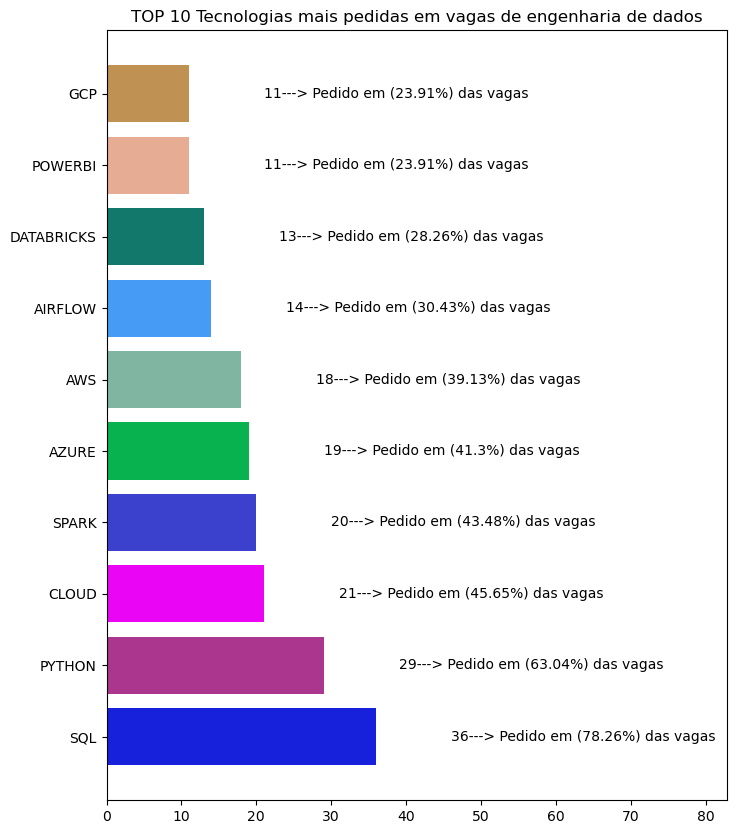

In [360]:
contagem_tecnologias = df.lista.value_counts()[:10]
cores = []
for _ in range(len(contagem_tecnologias)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(8, 10))

bars = plt.barh(contagem_tecnologias.index, contagem_tecnologias, color=cores)
plt.title("TOP 10 Tecnologias mais pedidas em vagas de engenharia de dados")

for bar, valor in zip(bars, contagem_tecnologias):
    plt.text(bar.get_width()+10, bar.get_y() + bar.get_height()/2, f'{valor}---> Pedido em ({round((valor / (len(df_temp))*100),2)}%) das vagas', ha='left', va='center')
plt.xlim(right=max(contagem_tecnologias) * 2.3)
plt.show()

In [361]:
print("TEMOS " + str(len(dados_nao_nulos[dados_nao_nulos.requisitos=='Não especificado'])) +" VAGAS SEM REQUISITOS ESPECIFICADOS")

TEMOS 19 VAGAS SEM REQUISITOS ESPECIFICADOS


In [362]:
# dados_nao_nulos = dados_nao_nulos.drop(columns=['lista'])

In [363]:
# dados_nao_nulos[dados_nao_nulos['requisitos'].str.contains("GIT")].loc[10].description

In [364]:
regex_str_posicao = 'Estagiário|Estagiario|Junior|Júnior|JR|Nivel 1|Nivel I|Nível 1|Nível I|Pleno/Sênior|Senior|Sênior|SR|Pleno|Tech Lead|Tech-lead|Diretor|Coordenador|Gerente'


In [365]:
#Buscar posicao no titulo da vaga
def busca_posicao(title):
    tecnologia =''
    if re.findall(regex_str_posicao, title,re.IGNORECASE) != []:
        tecnologia = re.findall(regex_str_posicao, title,re.IGNORECASE)[0].upper().replace(" ","").replace("-","")
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia 

def busca_posicao_detalhe(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

def busca_posicao_descricao(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

In [366]:
dados_nao_nulos['posicao'] = dados_nao_nulos.title.apply(lambda x: busca_posicao(x))

In [367]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.experience_level.apply(lambda x: busca_posicao_detalhe(x))

In [368]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.description.apply(lambda x: busca_posicao_descricao(x))

In [369]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['SR', 'SENIOR']),'posicao']="SÊNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JR']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JÚNIOR']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['NÍVELI','NÍVEL1']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['TECH LEAD,TECH-LEAD']),'posicao']="TECH-LEAD"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['ESTAGIÁRIO']),'posicao']="ESTAGIARIO"

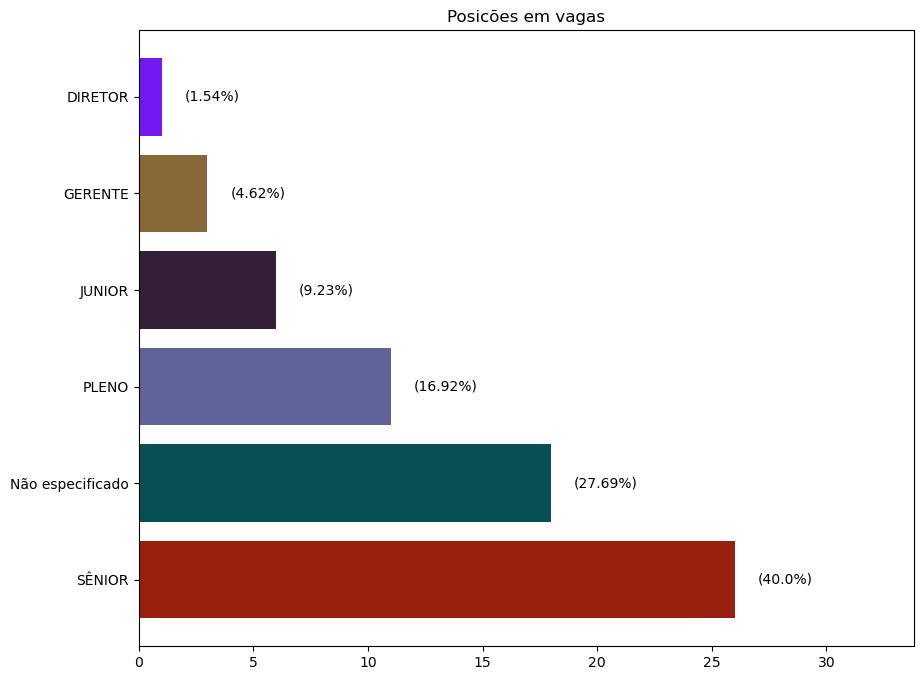

In [370]:
contagem_posicoes = dados_nao_nulos.posicao.value_counts()
cores = []
for _ in range(len(contagem_posicoes)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(10, 8))

bars = plt.barh(contagem_posicoes.index, contagem_posicoes, color=cores)
plt.title("Posicões em vagas")

for bar, valor in zip(bars, contagem_posicoes):
    plt.text(bar.get_width()+1, bar.get_y() + bar.get_height()/2, f'({round((valor / (len(dados_nao_nulos.posicao)))*100,2)}%)', ha='left', va='center')
plt.xlim(right=max(contagem_posicoes) * 1.3)
plt.show()

In [371]:
dados_grafico2=dados_nao_nulos[(dados_nao_nulos.posicao!='Não especificado') & (dados_nao_nulos.requisitos!='Não especificado') & (dados_nao_nulos.posicao!="DIRETOR")& (dados_nao_nulos.posicao!="COORDENADOR")& (dados_nao_nulos.posicao!="ESTAGIARIO")& (dados_nao_nulos.posicao!="GERENTE")& (dados_nao_nulos.posicao!="TECHLEAD")& (dados_nao_nulos.posicao!="PLENO/SÊNIOR")]  


In [372]:
dados_explodidos = dados_grafico2.assign(requisitos=dados_grafico2['requisitos'].str.split(', ')).explode('requisitos')

# Em seguida, agrupe pelos valores da coluna 'posicao' e conte os valores da coluna 'requisitos' após a explosão
contagem_requisitos = dados_explodidos.groupby('posicao')['requisitos'].value_counts()

contagem_requisitos2 = dados_explodidos.groupby(['posicao', 'requisitos']).size()

# Use value_counts() e depois nlargest() para obter os 10 principais valores
top10_por_posicao = contagem_requisitos2.groupby(level=0).nlargest(10).reset_index(level=1, drop=True)

# Agora você tem a contagem de cada requisito para cada posição


[[ 2.  1.  1.  2.  0.  0.  2.  2.  2.  0.  3.  3.  5.]
 [ 3.  5.  5.  5.  3.  0.  3.  0.  0.  3.  6.  4. 10.]
 [ 7.  9. 12. 11.  8.  5.  0.  0.  0.  7. 15.  8. 16.]]


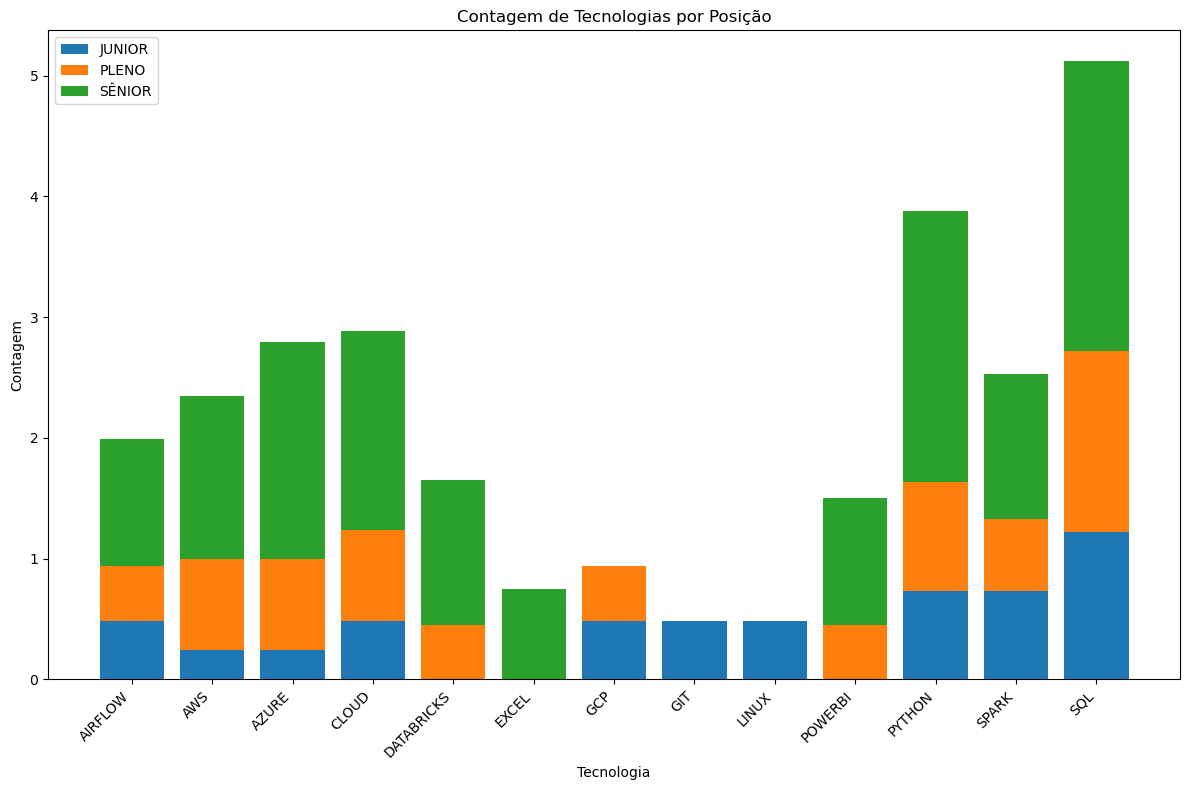

In [373]:
dados = top10_por_posicao

posicoes = sorted(set(posicao for posicao, _ in dados.keys()))
tecnologias = sorted(set(tecnologia for _, tecnologia in dados.keys()))

# Criar uma matriz de contagem de tecnologias para todas as posições
matriz_contagem = np.zeros((len(posicoes), len(tecnologias)))

# Preencher a matriz com as contagens reais
for i, posicao in enumerate(posicoes):
    for j, tecnologia in enumerate(tecnologias):
        matriz_contagem[i, j] = dados.get((posicao, tecnologia), 0)

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
print(matriz_contagem)


total_vacancies = np.sum(matriz_contagem)

# Percentages for each position
percentages = np.array([0.2438, 0.15, 0.15])  # Junior, Pleno, Senior

# Calculate target number of vacancies for each position
target_vacancies = percentages * total_vacancies

# Adjust the vacancies in the matrix according to the target number of vacancies
adjusted_matrix = np.zeros_like(matriz_contagem)
for i in range(matriz_contagem.shape[0]):
    for j in range(matriz_contagem.shape[1]):
        position_percentage = matriz_contagem[i, j] / total_vacancies
        adjusted_matrix[i, j] = target_vacancies[i] * position_percentage    
        
bottom = np.zeros(len(tecnologias))
for i, posicao in enumerate(posicoes):
    plt.bar(tecnologias, adjusted_matrix[i], label=posicao, bottom=bottom)
    bottom += adjusted_matrix[i]


plt.xlabel('Tecnologia')
plt.ylabel('Contagem')
plt.title('Contagem de Tecnologias por Posição')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

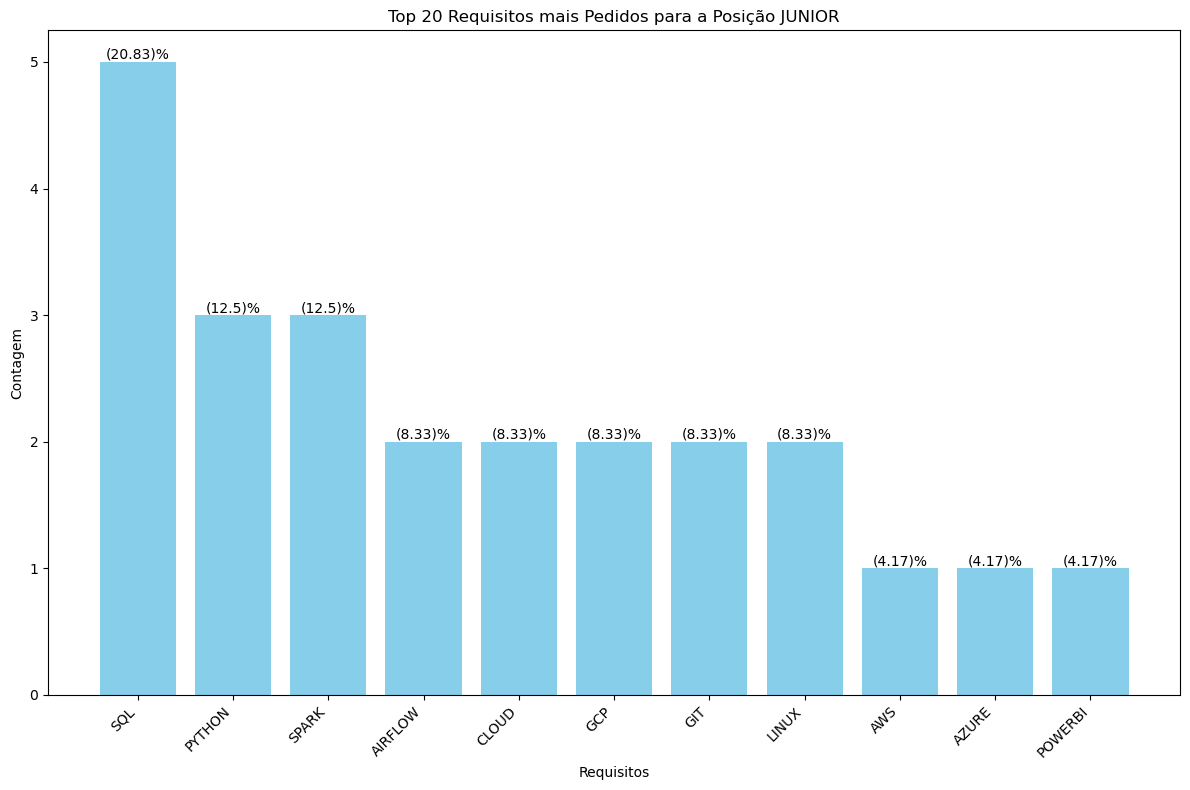

In [374]:
dados_junior = contagem_requisitos.loc['JUNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_junior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars=plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='skyblue')

for bar, valor in zip(bars, dados_junior_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_junior_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição JUNIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

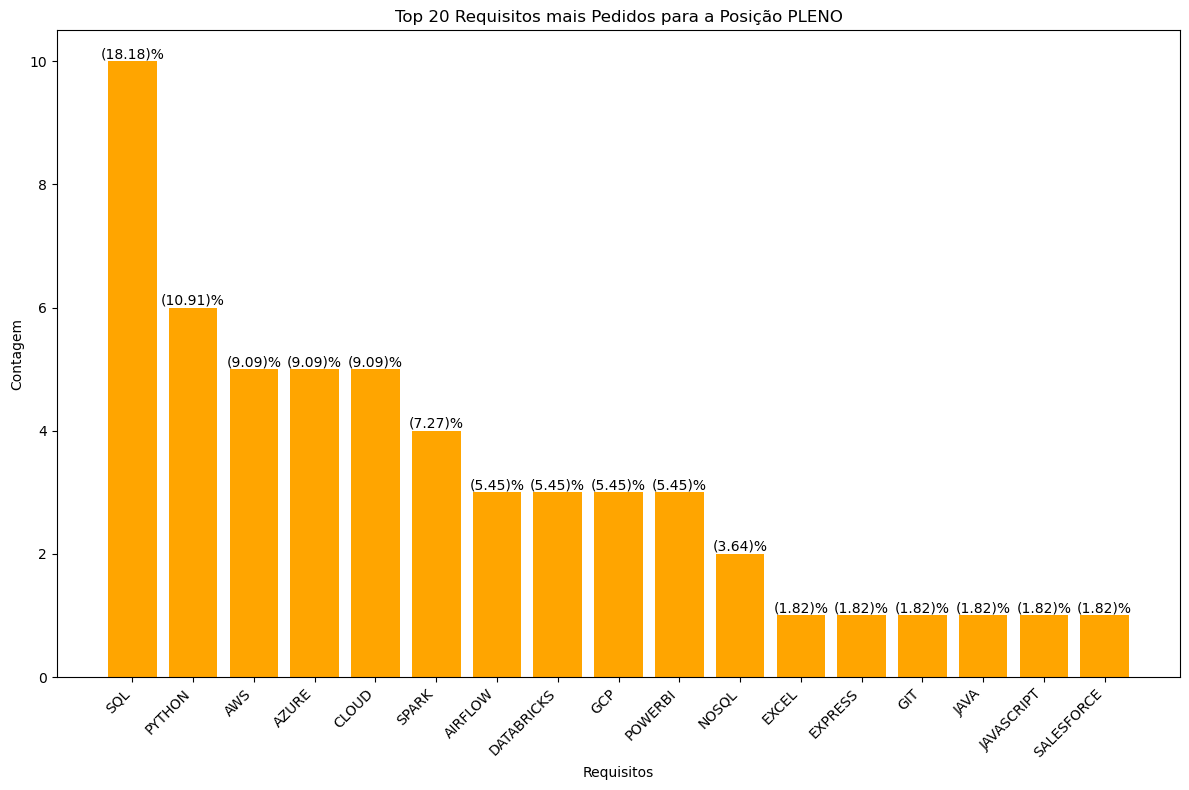

In [375]:
# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_pleno = contagem_requisitos.loc['PLENO']
dados_pleno_top10 = dados_pleno.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(dados_pleno_top10.index, dados_pleno_top10.values, color='orange')

for bar, valor in zip(bars, dados_pleno_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_pleno_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição PLENO')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

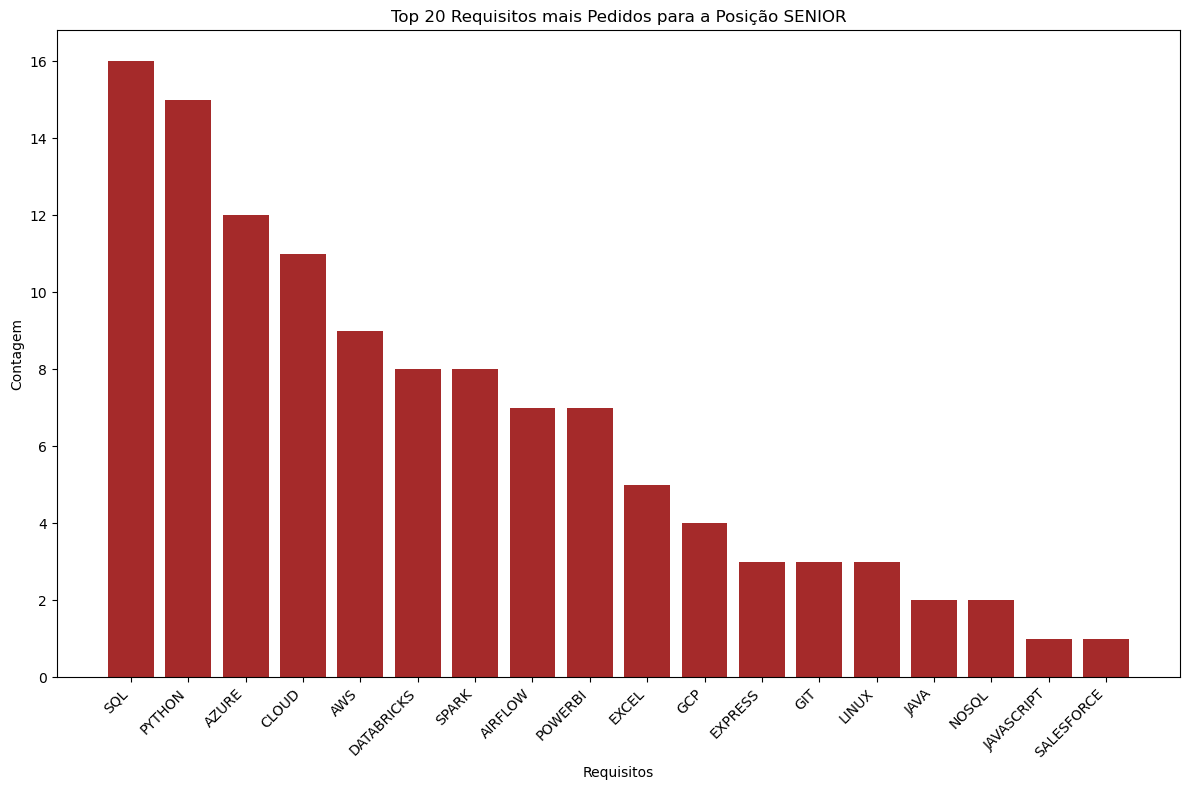

In [376]:
dados_senior = contagem_requisitos.loc['SÊNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_senior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='brown')
plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição SENIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [377]:
dados_nao_nulos.drop(columns=['lista'], inplace=True)

In [378]:
vagas_junior=dados_nao_nulos[dados_nao_nulos.posicao=="JUNIOR"]

In [379]:
vagas_junior.to_excel("vagas_junior.xlsx")

In [380]:
dados_nao_nulos

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description,requisitos,posicao
id,,,,,,,,,,,,,,,
1,3836417154,2024-03-04,PagBank,Engenheiro de Dados Jr.,São Paulo e Região,Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,Não especificado,JUNIOR
3,3801130908,2024-03-04,Grupo Abril,TI | Engenheiro de Dados Júnior,São Paulo e Região,Há 1 mês,https://br.linkedin.com/jobs/view/ti-engenheir...,>25,Assistente,Tempo integral,Tecnologia da informação,Produção de mídia,O Grupo Abril está com uma posição de Engenhei...,"SPARK, AIRFLOW, LINUX, CLOUD, SQL",JUNIOR
5,3838913545,2024-03-04,Stefanini Brasil,Engenheiro de Dados - São Paulo/SP,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/engenheiro-d...,<=25,Assistente,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Job DescriptionSomos a maior multinacional bra...,"SPARK, AZURE, DATABRICKS, PYTHON, AIRFLOW, JAV...",SÊNIOR
6,3830615469,2024-03-04,Delfia,Engenheiro de dados,"São Paulo, SP",Há 2 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,Não especificado,Não especificado
10,3815228508,2024-03-04,Sinqia,ENGENHEIRO DE DADOS PL/SR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/engenheiro-d...,Hidden,Pleno-sênior,Tempo integral,Tecnologia da informação,Segurança de redes e computadores,"Sinqia, provedora da experiência mais desejada...","SPARK, AZURE, DATABRICKS, PYTHON, EXCEL, CLOUD...",SÊNIOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,3836233537,2024-03-05,Bradesco,DATA ENGINEER I,"Osasco, SP",Há 1 semana,https://br.linkedin.com/jobs/view/data-enginee...,>25,Não aplicável,Tempo integral,Financeiro e Outro,Bancos e Bancos de investimento,Sobre o BradescoSomos um dos mais modernos Ban...,"SPARK, PYTHON, LINUX, SQL",Não especificado
370,3817453100,2024-03-05,Banco Master,ANALISTA DE ENGENHARIA DE DADOS JUNIOR,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/analista-de-...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Bancos,Job DescriptionAtuar na implantação de pipelin...,"SPARK, GCP, AWS, PYTHON, AIRFLOW, CLOUD, GIT, SQL",JUNIOR
720,3820778228,2024-03-05,PagBank,Gerente de Engenharia de Dados,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/gerente-de-e...,>25,Pleno-sênior,Tempo integral,Engenharia e Tecnologia da informação,Atividades de serviços financeiros,Descrição da VagaNascemos para democratizar os...,"AWS, GCP",GERENTE
